# House Pricing Prediction Model

In [3]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [1]:
df = pd.read_csv('Housing.csv')

NameError: name 'pd' is not defined

In [5]:
df.head(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## Data Visualization

In [6]:
df.shape

(545, 13)

In [7]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [8]:
import matplotlib.pyplot as plt
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (df.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (df.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))


Categorical variables: 7
Integer variables: 6
Float variables: 0


<Axes: title={'center': 'No. Unique values of Categorical Features'}>

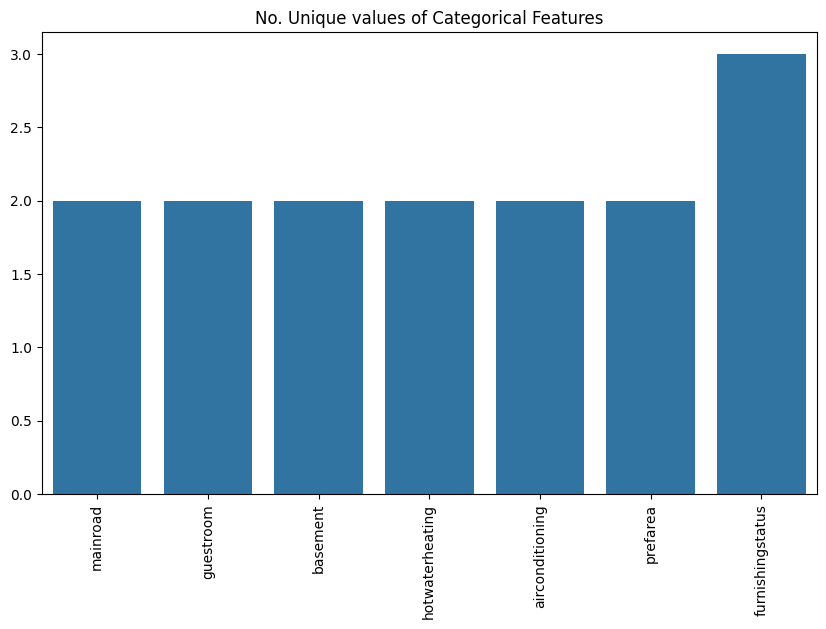

In [9]:
unique_values = []
for col in object_cols:
  unique_values.append(df[col].unique().size)
plt.figure(figsize=(10,6))
plt.title('No. Unique values of Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=object_cols,y=unique_values)


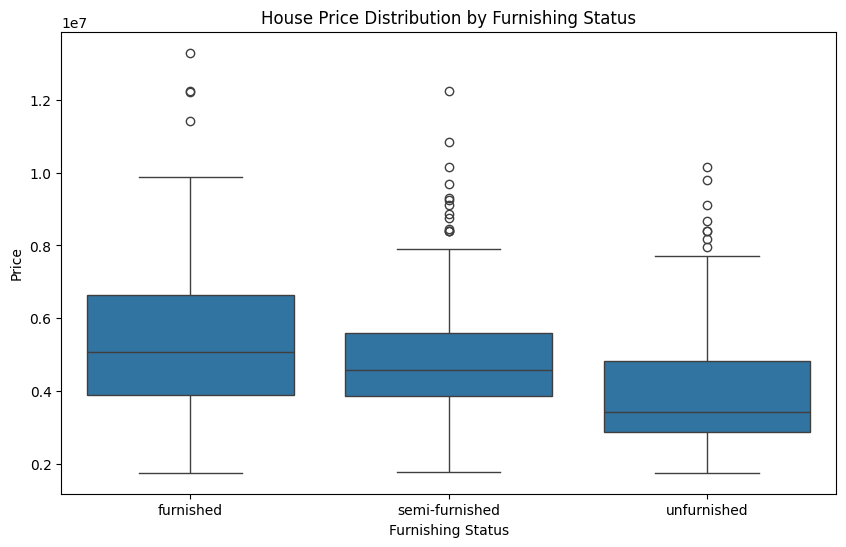

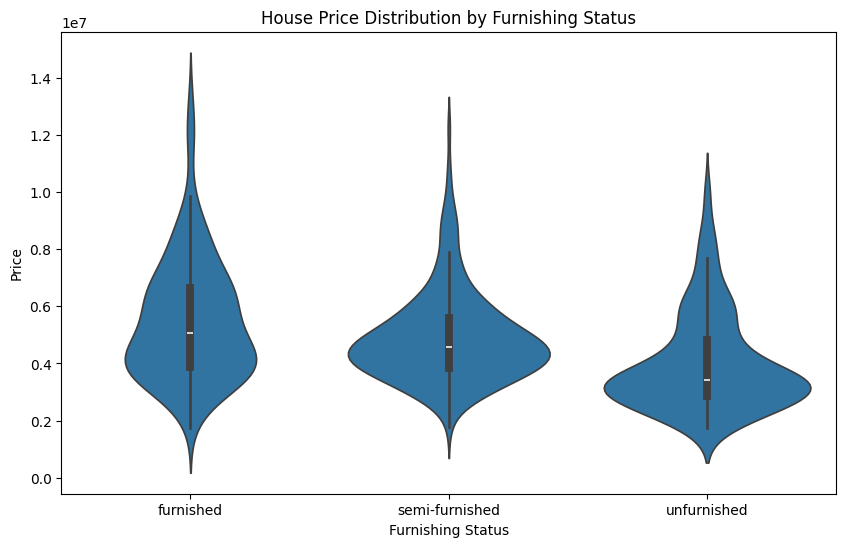

In [10]:
# Create a boxplot to show the distribution of house prices based on furnishing status
plt.figure(figsize=(10, 6))
sns.boxplot(x='furnishingstatus', y='price', data=df)
plt.title('House Price Distribution by Furnishing Status')
plt.xlabel('Furnishing Status')
plt.ylabel('Price')
plt.show()

# Alternatively, you can use a violin plot for a more detailed view
plt.figure(figsize=(10, 6))
sns.violinplot(x='furnishingstatus', y='price', data=df)
plt.title('House Price Distribution by Furnishing Status')
plt.xlabel('Furnishing Status')
plt.ylabel('Price')
plt.show()

## Data Preprocessing

In [11]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder


# 1. Apply Ordinal Encoding to 'furnishingstatus'
ordinal_encoder = OrdinalEncoder(categories=[['unfurnished', 'semi-furnished', 'furnished']])
df['furnishingstatus'] = ordinal_encoder.fit_transform(df[['furnishingstatus']])

# 2. Apply One-Hot Encoding to other categorical columns
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning',  'prefarea']

# Use pandas get_dummies for One-Hot Encoding
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Check the final dataset
print(df.head())


      price  area  bedrooms  bathrooms  stories  parking  furnishingstatus  \
0  13300000  7420         4          2        3        2               2.0   
1  12250000  8960         4          4        4        3               2.0   
2  12250000  9960         3          2        2        2               1.0   
3  12215000  7500         4          2        2        3               2.0   
4  11410000  7420         4          1        2        2               2.0   

   mainroad_yes  guestroom_yes  basement_yes  hotwaterheating_yes  \
0          True          False         False                False   
1          True          False         False                False   
2          True          False          True                False   
3          True          False          True                False   
4          True           True          True                False   

   airconditioning_yes  prefarea_yes  
0                 True          True  
1                 True         False  

## Prediction

In [12]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = df.drop(['price'], axis=1)
Y = df['price']

# Split the training set into 
# training and validation set
X_train, X_valid, Y_train, Y_valid = train_test_split(
    X, Y, train_size=0.8, test_size=0.2, random_state=0)


### using SVM

In [13]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)
Y_pred = model_SVR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))


0.27100738252962286


### Using RandomForestRegressor

In [14]:
from sklearn.ensemble import RandomForestRegressor

model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_valid)

mean_absolute_percentage_error(Y_valid, Y_pred)


0.17758181135469397

### Using Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression

model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)

print(mean_absolute_percentage_error(Y_valid, Y_pred))


0.16042841428119312


### Interpretation:
- MAPE of 16.04% means that, on average, the model's predictions for house prices are off by around 16.04% from the actual prices.
- This is a good result for a model like Linear Regression, which assumes a linear relationship between features and the target variable for this dataset.
- While this is better than the previous models (e.g., SVR and Random Forest), Linear Regression might still have limitations, especially if the relationship between the features and the target price is non-linear.

